### Assignment1_v2

Показать на эксперименте, что верхняя оценка на вероятность коллизии композиционного хеша для строк выполняется O(1/m + L/p). Подробнее в материалах лекции.

Построить графики зависимости FPR от длинны строк L и простого модуля p.

Эксперименты провести для L = np.linspace(10, 100, 11) и 10 простых чисел p из интервала (100, 1000)

Для каждой точки выполнить 10 экспериментов, на графике отобразить стандартное отклонение оценки в каждой точке.

Соответственно твой FPR = # коллизий * 2 / (1000 * (1000-1)). То есть ты делишь кол-во коллизий на кол-во всевозможных пар строк. Впринципе кол-во строк не принципиально

Да, все строки в эксперименте разные

Соответственно мы ожидаем рост коллизий с увеличением длинны строк не быстрее линейного

И уменьшение коллизий с ростом p по гиперболе

In [2]:
import numpy as np
import sklearn
import random
import sklearn
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
L = np.linspace(10, 100, 11)

In [4]:
primes = [101,103,107,109,113,127,131,137,139,149,151,157,163,167,173,179,181,191,193,197,199,211,223,227,229,233,239,241,251,257,263,269,271,277,281,283,293,307,311,313,317,331,337,347,349,353,359,367,373,379,383,389,397,401,409,419,421,431,433,439,443,449,457,461,463,467,479,487,491,499,503,509,521,523,541,547,557,563,569,571,577,587,593,599,601,607,613,617,619,631,641,643,647,653,659,661,673,677,683,691,701,709,719,727,733,739,743,751,757,761,769,773,787,797,809,811,821,823,827,829,839,853,857,859,863,877,881,883,887,907,911,919,929,937,941,947,953,967,971,977,983,991,997]

In [5]:
prime_sample = sorted(random.sample(primes, 10))

In [6]:
prime_sample

[163, 199, 293, 487, 541, 587, 619, 757, 809, 907]

In [7]:
def hash_int(x, a=112, b=22, p=997):
    return (a*x + b) % p

def poly_hash(s, x=31, p=997):
    h = 0
    for j in range(len(s)-1, -1, -1):
        h = (h * x + ord(s[j]) + p) % p
    return h

def final_hash(s, x=31, p=997, a=112, b=22):
    return hash_int(poly_hash(s, x, p), a, b, p)

In [8]:
def get_strings(l, n=1000):
    strings = set()
    for i in range(n):
        strings.add(''.join(random.choice('abcdefghijklmnopqrstuvwxyz') for i in range(int(l))))
        
    return strings

In [9]:
from collections import Counter

def get_fpr(hashes):
    
    N = 0
    hc = Counter(hashes)
    
    for i in hc:
        if hc[i] > 1:
            N += hc[i] // 2
    fpr = N * 2 / (1000 *  (1000 - 1))
    return fpr

Фиксируешь p и проводишь по 10 экспериментов для 11 разных L

In [10]:
p = random.choice(prime_sample)

mean_fpr = []
std_fpr = []

for l in L:
    frp = []
    for i in range(10):
        strings = get_strings(l)
        hashes = [final_hash(string, p) for string in strings]
        frp.append(get_fpr(hashes))
        
    mean_fpr.append(np.mean(frp))
    std_fpr.append(np.std(frp))

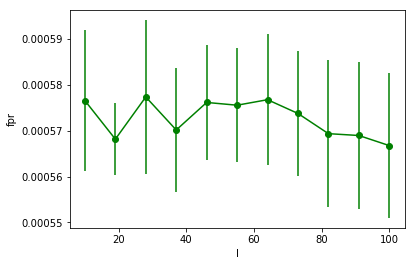

In [11]:
plt.errorbar(L, mean_fpr, std_fpr, fmt='-go')
plt.xlabel('l')
plt.ylabel('fpr')
plt.show()

Потом фиксируешь L и проводишь по 10 экспериментов для 10 разных p из указанного интервала:

In [12]:
l = random.choice(L)

mean_fpr = []
std_fpr = []

for p in prime_sample:
    frp = []
    for i in range(10):
        strings = get_strings(l)
        hashes = [final_hash(string, p) for string in strings]
        frp.append(get_fpr(hashes))
        
    mean_fpr.append(np.mean(frp))
    std_fpr.append(np.std(frp))

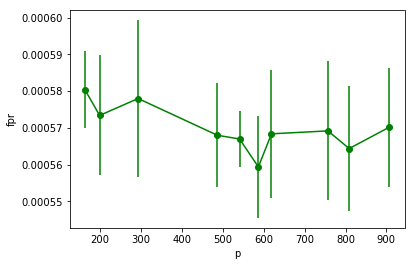

In [13]:
plt.errorbar(prime_sample, mean_fpr, std_fpr, fmt='-go')
plt.xlabel('p')
plt.ylabel('fpr')
plt.show()

In [14]:
std_fpr

[1.0496678061195868e-05,
 1.6343008313880708e-05,
 2.1301338932884642e-05,
 1.4129369360235343e-05,
 7.533488577468185e-06,
 1.3876054815746508e-05,
 1.746337980744173e-05,
 1.888791014236202e-05,
 1.706875488852352e-05,
 1.6210036020017744e-05]